In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
df_2015 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
df_2016 = pd.read_csv('/kaggle/input/world-happiness/2016.csv')
df_2017 = pd.read_csv('/kaggle/input/world-happiness/2017.csv')
df_2018 = pd.read_csv('/kaggle/input/world-happiness/2018.csv')
df_2019 = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

print("Tüm veri setleri başarıyla yüklendi.")

# Her bir veri setinin sütun isimlerini yazdıralım
print("\n--- 2015 Sütunları ---")
print(df_2015.columns.tolist())

print("\n--- 2016 Sütunları ---")
print(df_2016.columns.tolist())

print("\n--- 2017 Sütunları ---")
print(df_2017.columns.tolist())

print("\n--- 2018 Sütunları ---")
print(df_2018.columns.tolist())

print("\n--- 2019 Sütunları ---")
print(df_2019.columns.tolist())

Tüm veri setleri başarıyla yüklendi.

--- 2015 Sütunları ---
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

--- 2016 Sütunları ---
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

--- 2017 Sütunları ---
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

--- 2018 Sütunları ---
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'P

In [3]:
# Her yıl için sütun eşleştirme ve yeniden adlandırma sözlükleri
# Amacımız hepsini aşağıdaki ortak sütunlara dönüştürmek:
# ['Country', 'Region', 'Happiness Rank', 'Happiness Score',
#  'GDP per Capita', 'Social Support', 'Life Expectancy',
#  'Freedom', 'Generosity', 'Perceptions of Corruption', 'Year']

# 2015 Sütunları: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
rename_2015 = {
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Family': 'Social Support',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Trust (Government Corruption)': 'Perceptions of Corruption'
}
# 2015 için sadece gerekli sütunları seçeceğiz
columns_2015 = ['Country', 'Region', 'Happiness Rank', 'Happiness Score',
                'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                'Freedom', 'Trust (Government Corruption)', 'Generosity']

# 2016 Sütunları: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
rename_2016 = {
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Family': 'Social Support',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Trust (Government Corruption)': 'Perceptions of Corruption'
}
# 2016 için sadece gerekli sütunları seçeceğiz
columns_2016 = ['Country', 'Region', 'Happiness Rank', 'Happiness Score',
                'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                'Freedom', 'Trust (Government Corruption)', 'Generosity']

# 2017 Sütunları: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
rename_2017 = {
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'Family': 'Social Support',
    'Health..Life.Expectancy.': 'Life Expectancy',
    'Trust..Government.Corruption.': 'Perceptions of Corruption'
}
# 2017 için gerekli sütunları seçeceğiz. 'Region' sütunu burada yok.
columns_2017 = ['Country', 'Happiness.Rank', 'Happiness.Score',
                'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
                'Freedom', 'Trust..Government.Corruption.', 'Generosity']


# 2018 Sütunları: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
rename_2018 = {
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP per Capita',
    'Social support': 'Social Support',
    'Healthy life expectancy': 'Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceptions of Corruption'
}
# 2018 için gerekli sütunları seçeceğiz. 'Region' sütunu burada da yok.
columns_2018 = ['Overall rank', 'Country or region', 'Score', 'GDP per capita',
                'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']

# 2019 Sütunları: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
rename_2019 = {
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP per Capita',
    'Social support': 'Social Support',
    'Healthy life expectancy': 'Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceptions of Corruption'
}
# 2019 için gerekli sütunları seçeceğiz. 'Region' sütunu burada da yok.
columns_2019 = ['Overall rank', 'Country or region', 'Score', 'GDP per capita',
                'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']


# Her bir DataFrame'i işle
def process_dataframe(df, year, rename_map, select_columns):
    df_processed = df[select_columns].copy() # Sadece ilgili sütunları seç ve kopya oluştur
    df_processed = df_processed.rename(columns=rename_map) # Sütunları yeniden adlandır

    # 2017, 2018, 2019'da Region sütunu yoksa ekleyip NaN ile doldur
    if 'Region' not in df_processed.columns:
        df_processed['Region'] = np.nan # NaN = Not a Number, boş değerler için kullanırız

    df_processed['Year'] = year # Yıl sütununu ekle
    return df_processed


df_2015_processed = process_dataframe(df_2015, 2015, rename_2015, columns_2015)
df_2016_processed = process_dataframe(df_2016, 2016, rename_2016, columns_2016)
df_2017_processed = process_dataframe(df_2017, 2017, rename_2017, columns_2017)
df_2018_processed = process_dataframe(df_2018, 2018, rename_2018, columns_2018)
df_2019_processed = process_dataframe(df_2019, 2019, rename_2019, columns_2019)

# Birleştirilmiş DataFrame'i oluşturalım
# df_processed'ların tümünün artık ortak sütun adlarına sahip olması gerekiyor
# ve Region sütunu olmayanlar için NaN ile doldurulmuş olması gerekiyor
combined_df = pd.concat([df_2015_processed, df_2016_processed, df_2017_processed, df_2018_processed, df_2019_processed], ignore_index=True)

print("\n--- Birleştirilmiş Veri Seti (İlk 5 Satır) ---")
print(combined_df.head())

print("\n--- Birleştirilmiş Veri Seti Bilgisi ---")
combined_df.info()

print("\n--- Birleştirilmiş Veri Seti Eksik Değerler ---")
print(combined_df.isnull().sum())


--- Birleştirilmiş Veri Seti (İlk 5 Satır) ---
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   GDP per Capita  Social Support  Life Expectancy  Freedom  \
0         1.39651         1.34951          0.94143  0.66557   
1         1.30232         1.40223          0.94784  0.62877   
2         1.32548         1.36058          0.87464  0.64938   
3         1.45900         1.33095          0.88521  0.66973   
4         1.32629         1.32261          0.90563  0.63297   

   Perceptions of Corruption  Generosity  Year  
0                    0.41978     0.29678  2015  
1                    0.14145     0.43630  2015  
2                    0.

In [4]:
# 'Perceptions of Corruption' sütunundaki eksik değeri medyan ile dolduralım
# Medyanı hesaplarken NaN değerlerini hariç tutarız
median_corruption = combined_df['Perceptions of Corruption'].median()
combined_df['Perceptions of Corruption'].fillna(median_corruption, inplace=True)

# Eksik değerleri tekrar kontrol edelim
print("\n--- Eksik Değerler (Temizlendikten Sonra) ---")
print(combined_df.isnull().sum())


--- Eksik Değerler (Temizlendikten Sonra) ---
Country                        0
Region                       467
Happiness Rank                 0
Happiness Score                0
GDP per Capita                 0
Social Support                 0
Life Expectancy                0
Freedom                        0
Perceptions of Corruption      0
Generosity                     0
Year                           0
dtype: int64


/tmp/ipykernel_13/1986892947.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Perceptions of Corruption'].fillna(median_corruption, inplace=True)



--- Tüm Yıllar Ortalamasına Göre En Mutlu 10 Ülke ---
Country
Denmark        7.5460
Norway         7.5410
Finland        7.5378
Switzerland    7.5114
Iceland        7.5110
Netherlands    7.4046
Canada         7.3506
Sweden         7.3192
New Zealand    7.3130
Australia      7.2762
Name: Happiness Score, dtype: float64


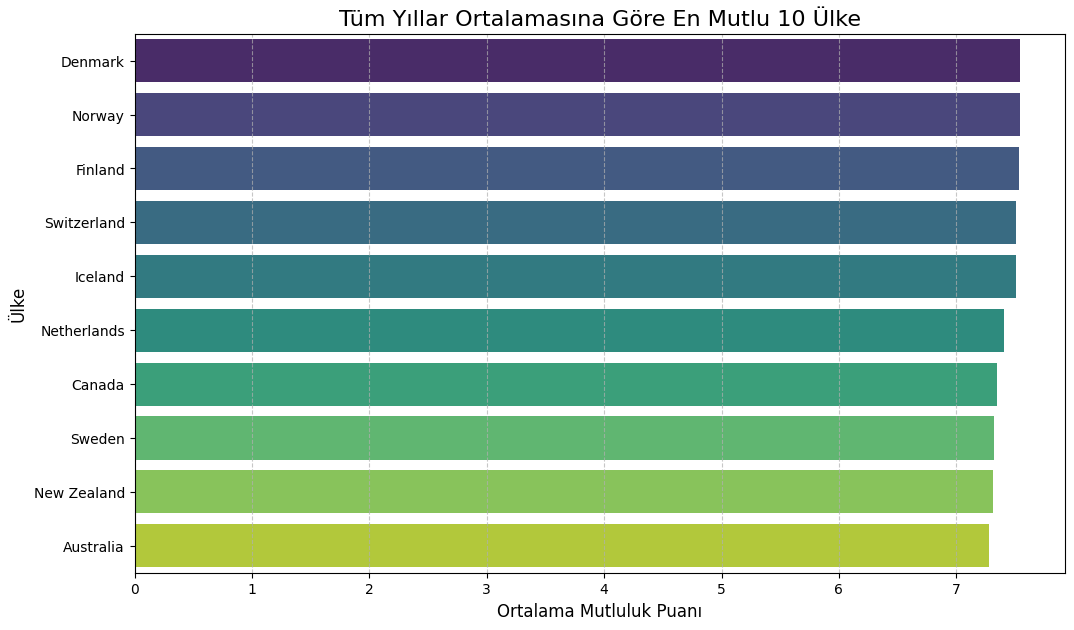

In [5]:
# Genel Mutluluk Skorunda En Yüksek Ülkeler
print("\n--- Tüm Yıllar Ortalamasına Göre En Mutlu 10 Ülke ---")
top_10_overall_happiness = combined_df.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False).head(10)
print(top_10_overall_happiness)

# Görselleştirme: Genel Mutluluk Skorunda En Yüksek Ülkeler
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_overall_happiness.values, y=top_10_overall_happiness.index, palette='viridis')
plt.title('Tüm Yıllar Ortalamasına Göre En Mutlu 10 Ülke', fontsize=16)
plt.xlabel('Ortalama Mutluluk Puanı', fontsize=12)
plt.ylabel('Ülke', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Gözlem: İlk 10'da 7 Batı Avrupa ülkesi yer alıyor.**


--- Tüm Yıllar Ortalamasına Göre Mutluluk Faktörlerinde En Yüksek Puanlı Ülkeler ---

***** Tüm Yıllar Ortalamasına Göre 'GDP per Capita' İçin En Yüksek 10 Ülke *****
Country
Qatar                      1.743691
United Arab Emirates       1.645227
Luxembourg                 1.637675
Singapore                  1.592138
Kuwait                     1.555662
Hong Kong S.A.R., China    1.551675
Norway                     1.519381
Switzerland                1.472164
Ireland                    1.460415
United States              1.455946
Name: GDP per Capita, dtype: float64


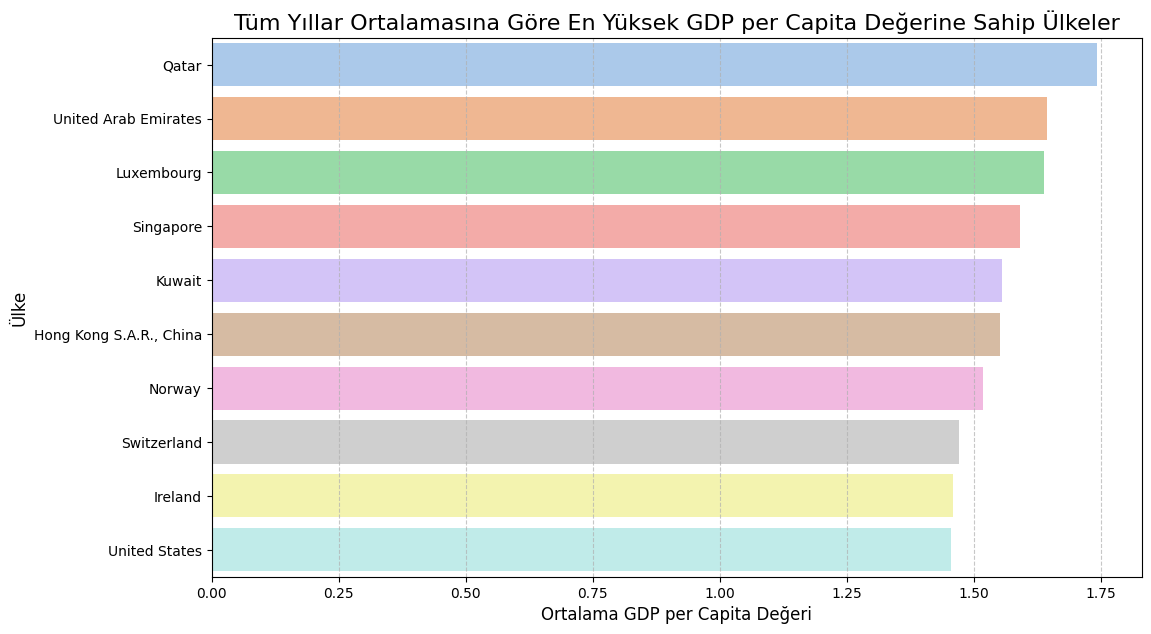


***** Tüm Yıllar Ortalamasına Göre 'Social Support' İçin En Yüksek 10 Ülke *****
Country
Iceland              1.492813
Trinidad & Tobago    1.484500
Denmark              1.447688
Ireland              1.445056
New Zealand          1.439729
Finland              1.434429
Uzbekistan           1.434100
Norway               1.431075
Switzerland          1.417332
Australia            1.409006
Name: Social Support, dtype: float64


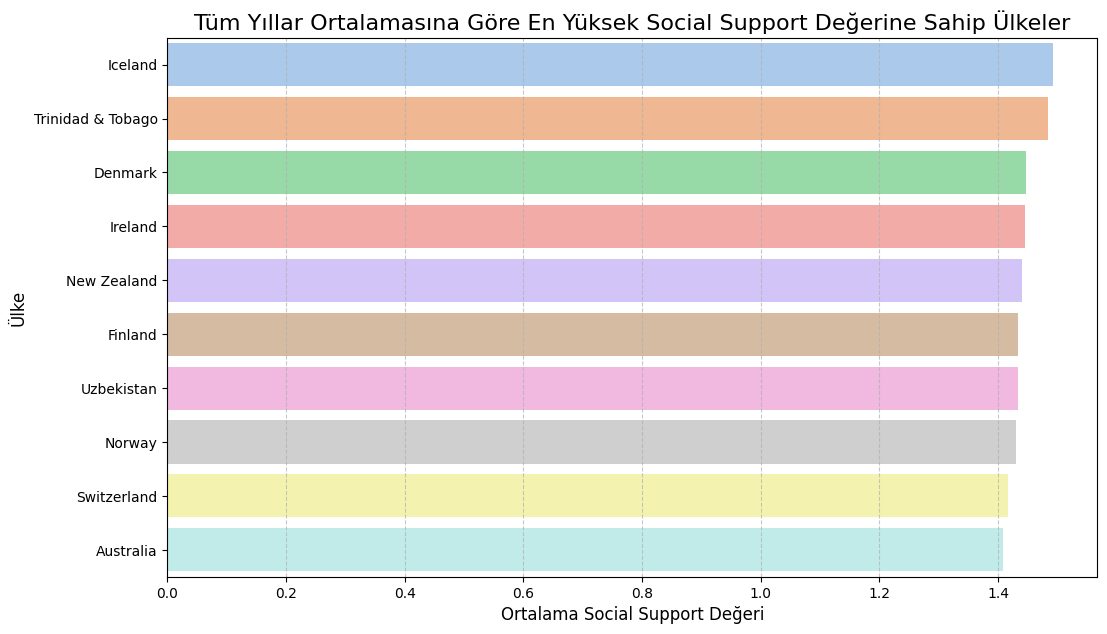


***** Tüm Yıllar Ortalamasına Göre 'Life Expectancy' İçin En Yüksek 10 Ülke *****
Country
Hong Kong                  1.029513
Singapore                  1.014186
Japan                      0.979099
Northern Cyprus            0.975500
Spain                      0.950108
South Korea                0.948609
Hong Kong S.A.R., China    0.943062
Italy                      0.928725
Switzerland                0.928318
Iceland                    0.917744
Name: Life Expectancy, dtype: float64


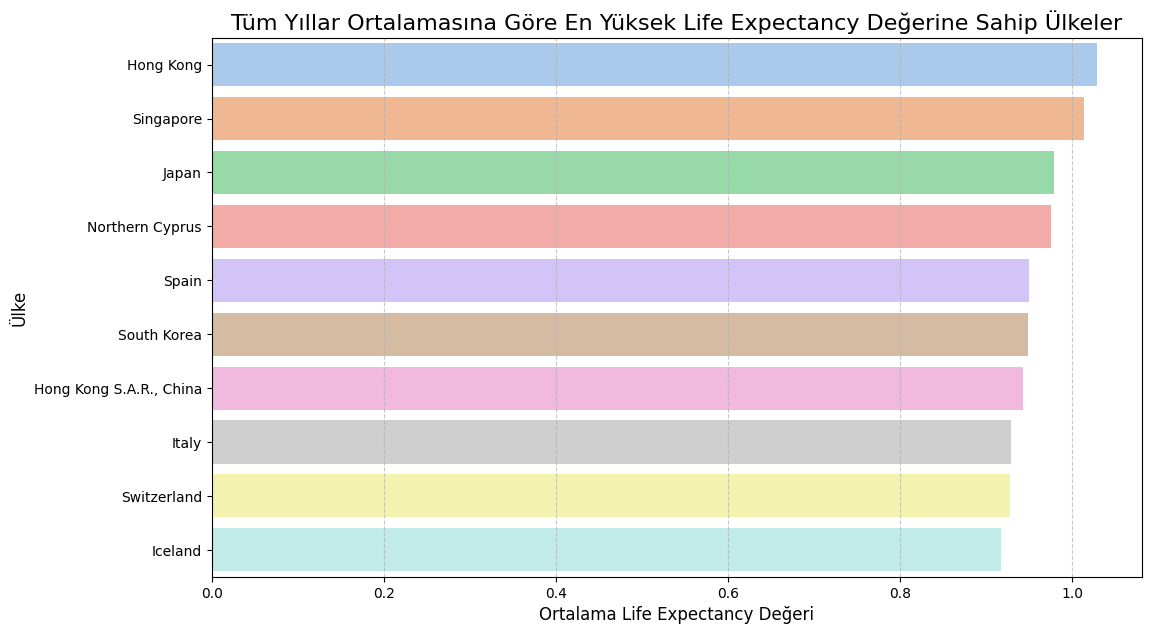


***** Tüm Yıllar Ortalamasına Göre 'Freedom' İçin En Yüksek 10 Ülke *****
Country
Uzbekistan     0.655988
Norway         0.638049
Cambodia       0.637871
Oman           0.632740
Denmark        0.625959
Finland        0.621536
Switzerland    0.620642
Iceland        0.618035
New Zealand    0.617782
Sweden         0.617581
Name: Freedom, dtype: float64


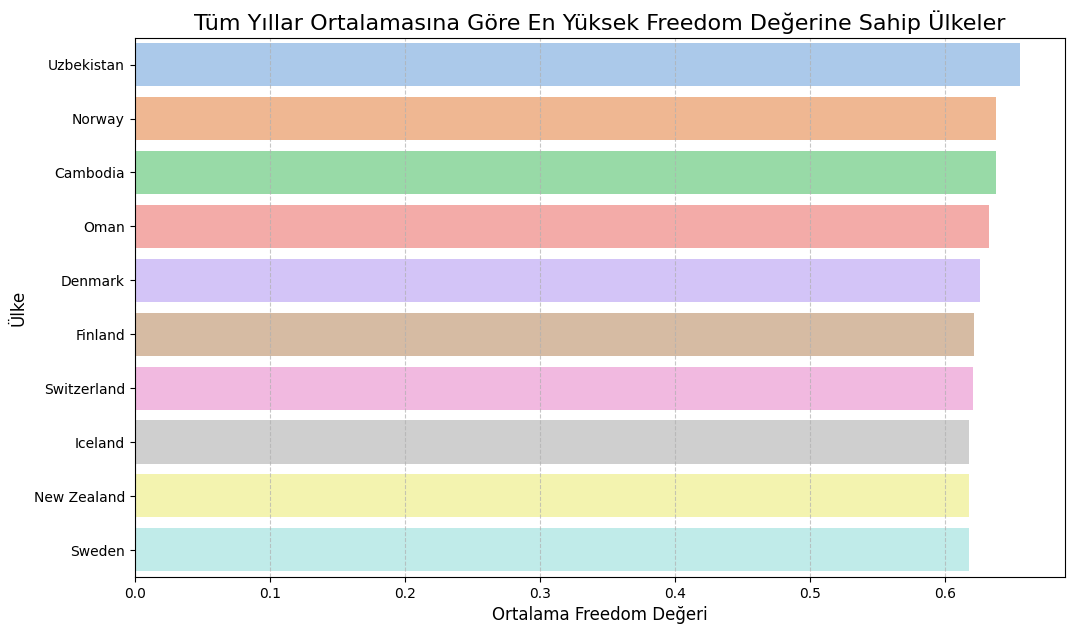


***** Tüm Yıllar Ortalamasına Göre 'Perceptions of Corruption' İçin En Yüksek 10 Ülke *****
Country
Rwanda               0.473468
Singapore            0.467256
Denmark              0.429374
New Zealand          0.400015
Somaliland region    0.399280
Finland              0.398474
Sweden               0.397502
Switzerland          0.379763
Somaliland Region    0.367940
Qatar                0.355974
Name: Perceptions of Corruption, dtype: float64


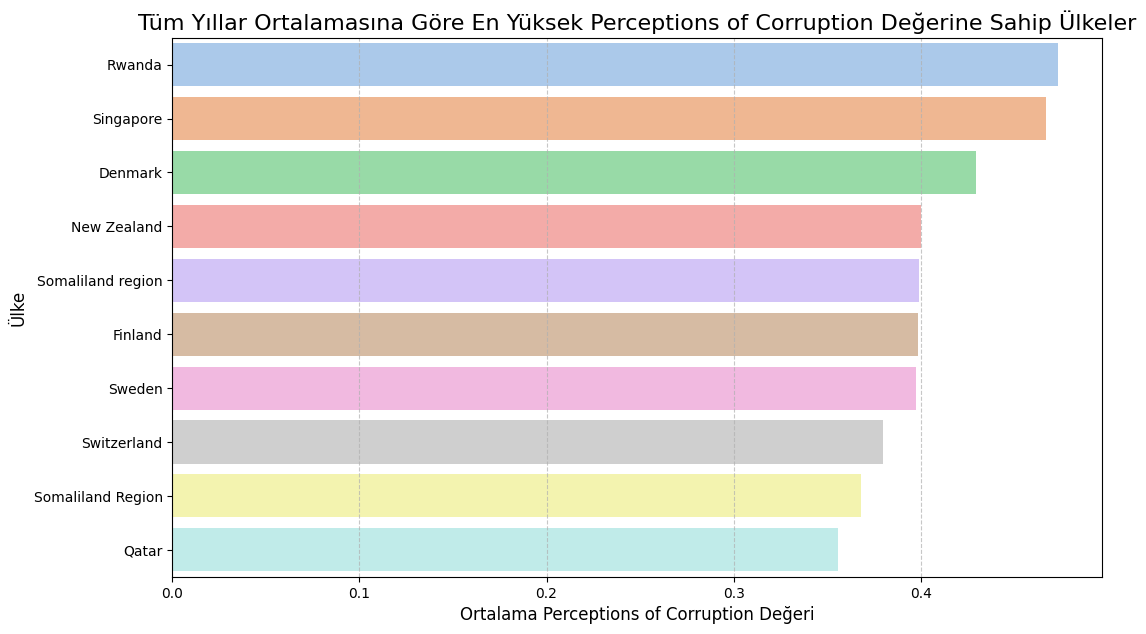


***** Tüm Yıllar Ortalamasına Göre 'Generosity' İçin En Yüksek 10 Ülke *****
Country
Myanmar              0.723533
Indonesia            0.534853
Somaliland Region    0.514790
Somaliland region    0.503180
Thailand             0.491677
Malta                0.481124
Haiti                0.448331
Bhutan               0.434699
New Zealand          0.432805
Syria                0.431285
Name: Generosity, dtype: float64


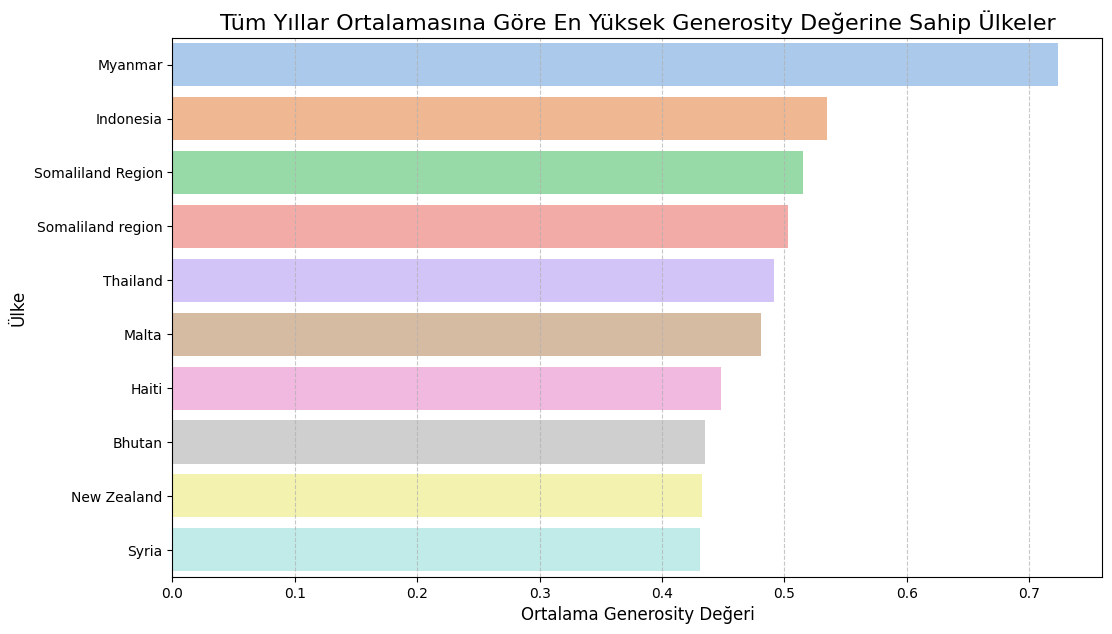

In [6]:
# Analiz edeceğimiz mutluluk faktörleri
happiness_factors = [
    'GDP per Capita',
    'Social Support',
    'Life Expectancy',
    'Freedom',
    'Perceptions of Corruption',
    'Generosity'
]

print("\n--- Tüm Yıllar Ortalamasına Göre Mutluluk Faktörlerinde En Yüksek Puanlı Ülkeler ---")

# Her bir mutluluk faktörü için analiz
for factor in happiness_factors:
    # Ülkelere göre ortalama puanları al ve sırala (En yüksek 10 ülke)
    avg_country_scores = combined_df.groupby('Country')[factor].mean().sort_values(ascending=False).head(10)

    print(f"\n***** Tüm Yıllar Ortalamasına Göre '{factor}' İçin En Yüksek 10 Ülke *****")
    print(avg_country_scores)

    # Görselleştirme: Ülkelere göre çubuk grafik
    plt.figure(figsize=(12, 7))
    sns.barplot(x=avg_country_scores.values, y=avg_country_scores.index, palette='pastel')
    plt.title(f'Tüm Yıllar Ortalamasına Göre En Yüksek {factor} Değerine Sahip Ülkeler', fontsize=16)
    plt.xlabel(f'Ortalama {factor} Değeri', fontsize=12)
    plt.ylabel('Ülke', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

***** Bölgelere Göre Ortalama Mutluluk Skoru *****
Region
Australia and New Zealand          7.304250
North America                      7.263500
Western Europe                     6.687643
Latin America and Caribbean        6.122283
Eastern Asia                       5.625167
Middle East and Northern Africa    5.396744
Central and Eastern Europe         5.351810
Southeastern Asia                  5.328167
Southern Asia                      4.572071
Sub-Saharan Africa                 4.170462
Name: Happiness Score, dtype: float64


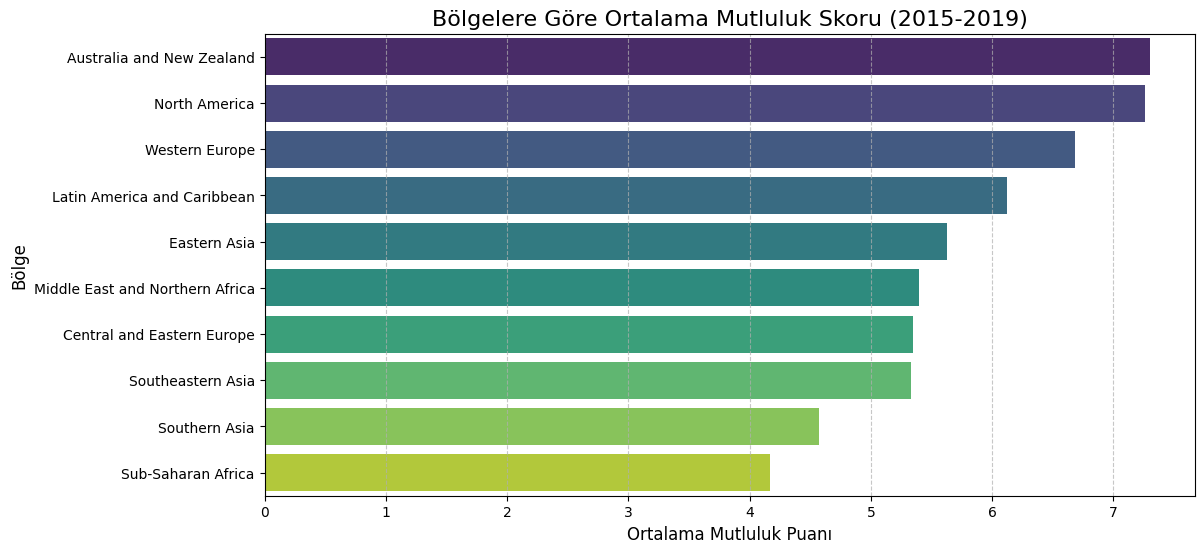

In [7]:
# Bölgelerin ortalama mutluluk skorunu hesapla ve sırala
regional_happiness = combined_df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
print("***** Bölgelere Göre Ortalama Mutluluk Skoru *****")
print(regional_happiness)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_happiness.values, y=regional_happiness.index, palette='viridis')
plt.title('Bölgelere Göre Ortalama Mutluluk Skoru (2015-2019)', fontsize=16)
plt.xlabel('Ortalama Mutluluk Puanı', fontsize=12)
plt.ylabel('Bölge', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [8]:
factors = ['GDP per Capita', 'Social Support', 'Life Expectancy', 'Freedom', 'Perceptions of Corruption', 'Generosity']

for factor in factors:
    # Bölgesel ortalamalar
    regional_avg = combined_df.groupby('Region')[factor].mean().sort_values(ascending=False)
    
    # Her bölgede en yüksek puan alan ülke
    top_country_per_region = combined_df.loc[combined_df.groupby('Region')[factor].idxmax()][['Region', 'Country', factor]]
    
    print(f"\n***** {factor} İçin Bölgesel Liderler *****")
    print(f"**Bölge Ortalamaları:**\n{regional_avg.head(3)}")
    print(f"\n**Her Bölgenin En Yüksek Puanlı Ülkesi:**\n{top_country_per_region.sort_values(by=factor, ascending=False).head(5)}")


***** GDP per Capita İçin Bölgesel Liderler *****
**Bölge Ortalamaları:**
Region
North America                1.417228
Western Europe               1.357826
Australia and New Zealand    1.347212
Name: GDP per Capita, dtype: float64

**Her Bölgenin En Yüksek Puanlı Ülkesi:**
                              Region        Country  GDP per Capita
193  Middle East and Northern Africa          Qatar         1.82427
177                   Western Europe     Luxembourg         1.69752
179                Southeastern Asia      Singapore         1.64555
232                     Eastern Asia      Hong Kong         1.51070
170                    North America  United States         1.50796

***** Social Support İçin Bölgesel Liderler *****
**Bölge Ortalamaları:**
Region
Australia and New Zealand    1.226610
North America                1.178410
Western Europe               1.144877
Name: Social Support, dtype: float64

**Her Bölgenin En Yüksek Puanlı Ülkesi:**
                         Region      Cou

/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,
/tmp/ipykernel_13/2552027780.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df,


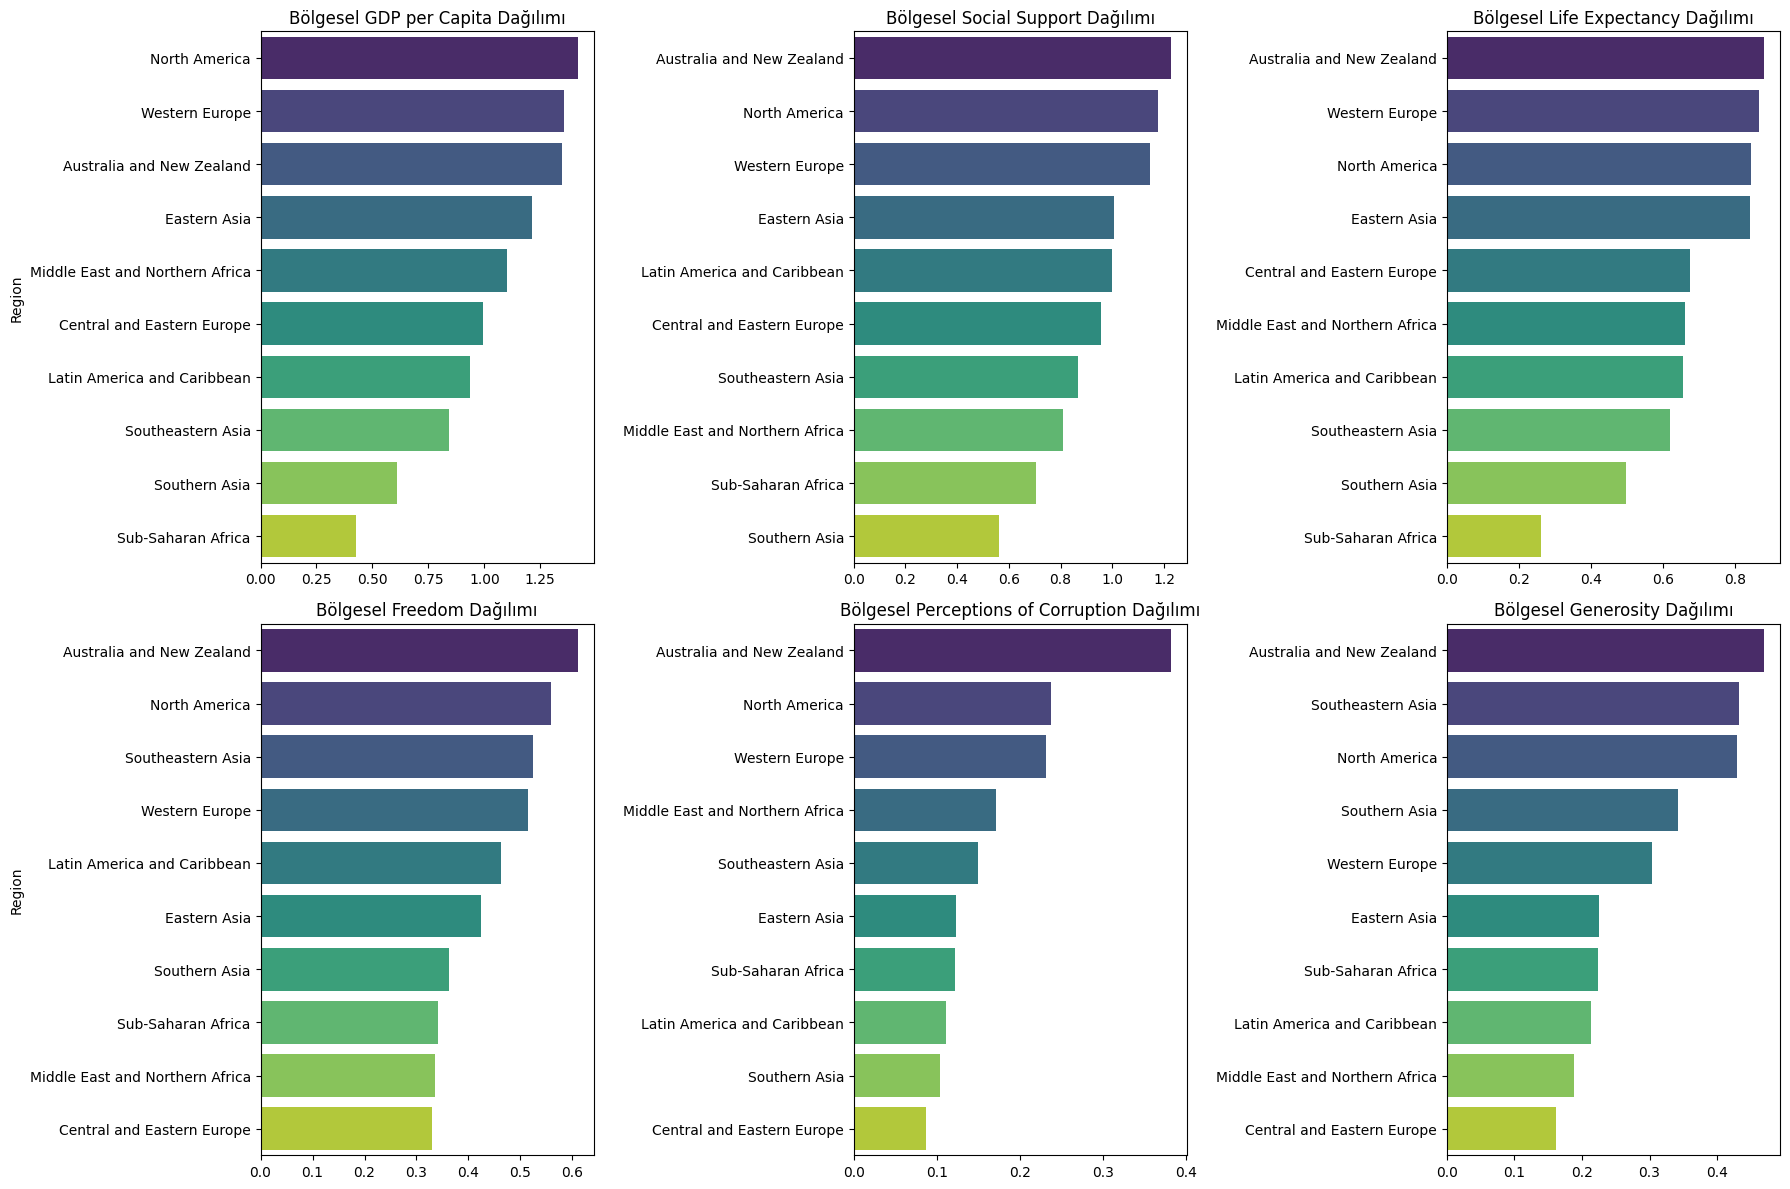

In [9]:

plt.figure(figsize=(18, 12))

for i, factor in enumerate(happiness_factors, 1):
    plt.subplot(2, 3, i)
    
    # Bölgesel ortalamaları hesapla ve sırala
    region_order = combined_df.groupby('Region')[factor].mean().sort_values(ascending=False).index
    
    sns.barplot(data=combined_df,
                x=factor,
                y='Region',
                order=region_order,
                ci=None,
                palette='viridis')
    
    plt.title(f'Bölgesel {factor} Dağılımı', fontsize=12)
    plt.xlabel('')
    if i not in [1,4]: plt.ylabel('')  # Sadece sol taraftaki grafiklerde y-ekseni etiketi

plt.tight_layout()
plt.show()


## 🌍 Genel Mutluluk Sıralaması

### 🏆 En Mutlu 10 Ülke
| Sıra | Ülke       | Bölge                  | Mutluluk Skoru |
|------|------------|------------------------|----------------|
| 1    | Danimarka  | Western Europe         | 7.546          |
| 2    | Norveç     | Western Europe         | 7.541          |
| 3    | Finlandiya | Western Europe         | 7.538          |
| 4    | İsviçre    | Western Europe         | 7.511          |
| 5    | İzlanda    | Western Europe         | 7.511          |
| 6    | Hollanda   | Western Europe         | 7.405          |
| 7    | Kanada     | North America          | 7.351          |
| 8    | İsveç      | Western Europe         | 7.319          |
| 9    | Y.Zelanda  | Australia and NZ       | 7.313          |
| 10   | Avustralya | Australia and NZ       | 7.276          |

**Gözlem:** İlk 10'da 7 Batı Avrupa ülkesi yer alıyor.


## 📊 Faktör Bazlı Liderler

### 💰 GDP per Capita (Ekonomik Refah)
**Top 3 Ülke:**
1. Katar (1.744)
2. UAE (1.645) 
3. Lüksemburg (1.638)

**Bölgesel Liderler:**
- Middle East: Katar
- Western Europe: Lüksemburg
- Southeastern Asia: Singapur

**Analiz:** Petrol zengini ülkeler ekonomik refahta açık ara önde.

### 🤝 Social Support (Sosyal Destek)
**Top 3 Ülke:**
1. İzlanda (1.493)
2. Trinidad (1.485)
3. Danimarka (1.448)

**Bölgesel Liderler:** 
- Western Europe: İzlanda
- Latin America: Paraguay
- Australia/NZ: Y.Zelanda


### 🏥 Life Expectancy (Yaşam Beklentisi)
**Top 3 Ülke:**
1. Hong Kong (1.030)
2. Singapur (1.014)  
3. Japonya (0.979)

**Bölgesel Liderler:**
- Eastern Asia: Hong Kong
- Western Europe: İspanya
- Middle East: İsrail


### 🕊️ Freedom (Özgürlük)
**Top 3 Ülke:**
1. Özbekistan (0.656)
2. Norveç (0.638)
3. Kamboçya (0.638)

**Bölgesel Liderler:**
- Western Europe: Norveç
- Southeastern Asia: Kamboçya  
- Central Asia: Özbekistan


### 🚫 Perceptions of Corruption
**Top 3 Ülke:**
1. Ruanda (0.473)
2. Singapur (0.467)
3. Danimarka (0.429)

**Bölgesel Liderler:**
- Sub-Saharan Africa: Ruanda
- Southeastern Asia: Singapur
- Western Europe: Danimarka


### 💝 Generosity (Cömertlik)
**Top 3 Ülke:**
1. Myanmar (0.724)
2. Endonezya (0.535)
3. Somaliland (0.515)

**Bölgesel Liderler:**
- Southeastern Asia: Myanmar
- Western Europe: Malta  
- Sub-Saharan Africa: Somaliland

**Kültürel Etki:** İlk 10'da 7 Asya ülkesi.



=== 2015-2016 Dönemi Önemli Değişimler ===

Mutluluk Puanı En Çok Artanlar:
         Score_Change_2015_2016
Algeria                   0.750
Togo                      0.464
Latvia                    0.462
Romania                   0.404
Hungary                   0.345

Mutluluk Puanı En Çok Azalanlar:
           Score_Change_2015_2016
Liberia                    -0.949
Venezuela                  -0.726
Haiti                      -0.490
Zimbabwe                   -0.417
Sudan                      -0.411

Sıralamada En Çok Yükselenler:
           Rank_Change_2015_2016
Algeria                       30
Latvia                        21
Cameroon                      19
Sri Lanka                     15
Romania                       15

Sıralamada En Çok Düşenler:
           Rank_Change_2015_2016
Liberia                      -34
Nigeria                      -25
Vietnam                      -21
Zambia                       -21
Venezuela                    -21

=== 2016-2017 Dönemi Önemli Değişim

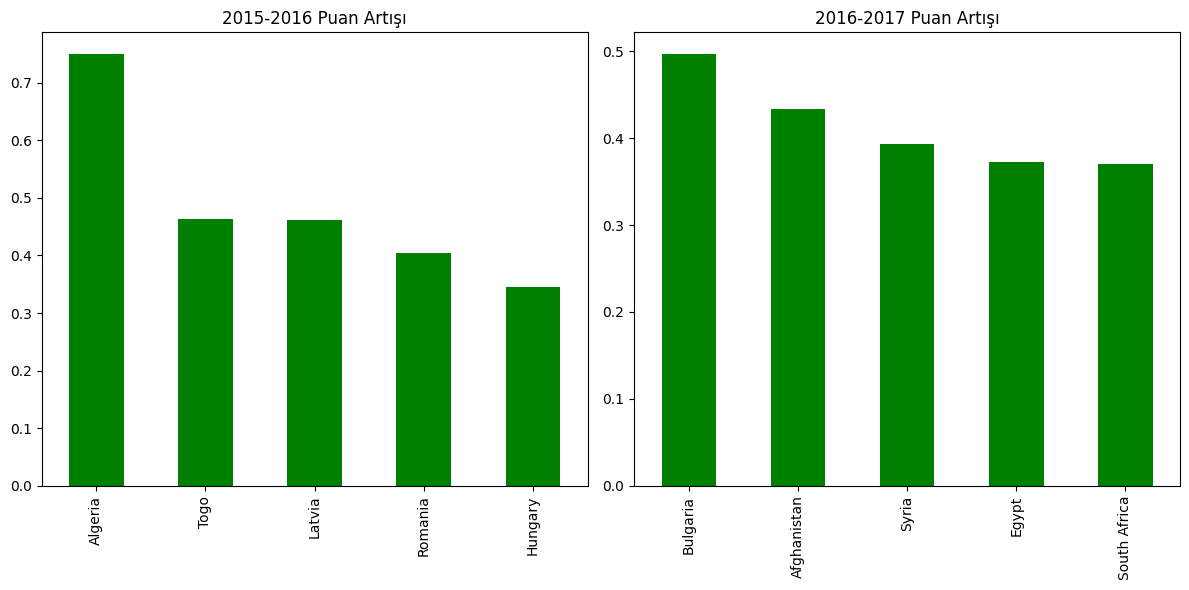

In [10]:
# 2015-2016 ve 2016-2017 karşılaştırması için
def compare_years(df, year1, year2):
    # Belirtilen yıllara ait veriyi filtrele
    df_year1 = df[df['Year'] == year1].set_index('Country')
    df_year2 = df[df['Year'] == year2].set_index('Country')

    # Ortak ülkeleri bul
    common_countries = list(set(df_year1.index) & set(df_year2.index))

    # Değişimleri hesapla
    changes = pd.DataFrame(index=common_countries)
    changes[f'Score_Change_{year1}_{year2}'] = df_year2.loc[common_countries, 'Happiness Score'] - df_year1.loc[common_countries, 'Happiness Score']
    changes[f'Rank_Change_{year1}_{year2}'] = df_year1.loc[common_countries, 'Happiness Rank'] - df_year2.loc[common_countries, 'Happiness Rank']

    return changes

# 2015-2016 ve 2016-2017 değişimleri
changes_2015_2016 = compare_years(combined_df, 2015, 2016)
changes_2016_2017 = compare_years(combined_df, 2016, 2017)

# En çok değişim gösteren ülkeleri bulma
def get_extreme_changes(changes, year1, year2, n=5):
    return {
        'Max_Score_Increase': changes.nlargest(n, f'Score_Change_{year1}_{year2}'),
        'Max_Score_Decrease': changes.nsmallest(n, f'Score_Change_{year1}_{year2}'),
        'Max_Rank_Improvement': changes.nlargest(n, f'Rank_Change_{year1}_{year2}'),
        'Max_Rank_Decline': changes.nsmallest(n, f'Rank_Change_{year1}_{year2}')
    }

# Sonuçları al
results_2015_2016 = get_extreme_changes(changes_2015_2016, 2015, 2016)
results_2016_2017 = get_extreme_changes(changes_2016_2017, 2016, 2017)

# Sonuçları güzelce gösterme
def print_changes(results, year1, year2):
    print(f"\n=== {year1}-{year2} Dönemi Önemli Değişimler ===")

    print("\nMutluluk Puanı En Çok Artanlar:")
    print(results['Max_Score_Increase'].iloc[:, 0].to_frame())

    print("\nMutluluk Puanı En Çok Azalanlar:")
    print(results['Max_Score_Decrease'].iloc[:, 0].to_frame())

    print("\nSıralamada En Çok Yükselenler:")
    print(results['Max_Rank_Improvement'].iloc[:, 1].to_frame())

    print("\nSıralamada En Çok Düşenler:")
    print(results['Max_Rank_Decline'].iloc[:, 1].to_frame())

# Sonuçları yazdır
print_changes(results_2015_2016, 2015, 2016)
print_changes(results_2016_2017, 2016, 2017)

# Görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
results_2015_2016['Max_Score_Increase'].iloc[:, 0].plot(kind='bar', color='green', title='2015-2016 Puan Artışı')
plt.subplot(1, 2, 2)
results_2016_2017['Max_Score_Increase'].iloc[:, 0].plot(kind='bar', color='green', title='2016-2017 Puan Artışı')
plt.tight_layout()
plt.show()

**2015'ten 2016'ya Mutluluk Puanı ve Sıralama Değişimi**
* 2015'ten 2016'ya geçişte mutluluk puanında en büyük artışı gösteren ülkeler arasında Cezayir (Algeria) dikkat çekmektedir, puanında 0.750'lik önemli bir artış yaşamıştır. Onu Togo, Letonya, Romanya ve Macaristan gibi ülkeler takip etmektedir. Bu ülkelerdeki artışlar, muhtemelen o dönemde yaşanan iç veya dış olumlu gelişmeler, ekonomik iyileşmeler veya sosyal reformlarla ilişkilendirilebilir.
* Aynı dönemde mutluluk puanında en büyük azalışları yaşayan ülkeler arasında Liberya (-0.949) ve Venezuela (-0.726) öne çıkmaktadır. Liberya ve Venezuela'daki bu keskin düşüşler, büyük olasılıkla siyasi istikrarsızlık, ekonomik krizler veya toplumsal sorunlarla bağlantılıdır. Haiti, Zimbabve ve Sudan da benzer şekilde kayda değer düşüşler yaşamıştır.
* Sıralamada en çok yükselen ülkelerin başında Cezayir (30 sıra) gelmektedir, bu da puanındaki artışla tutarlıdır. Letonya, Kamerun, Romanya ve Mısır da mutluluk sıralamasında önemli sıçramalar yapmıştır. Bu, nispeten daha az mutlu ülkelerin genel sıralamada daha üst basamaklara tırmandığını göstermektedir.
* Sıralamada en çok düşüş yaşayan ülkeler arasında Liberya (-34 sıra) başı çekmektedir. Nijerya, Vietnam, Venezuela ve Zambiya da bu dönemde sıralamada önemli kayıplar yaşamıştır. Bu düşüşler, ilgili ülkelerde yaşam kalitesini veya toplumsal refahı olumsuz etkileyen olayların bir yansıması olabilir.
**2016'dan 2017'ye Mutluluk Puanı ve Sıralama Değişimi**
* 2016'dan 2017'ye mutluluk puanında en büyük artışı yaşayan ülkelerin başında Bulgaristan (0.497) gelmektedir. Afganistan ve Suriye gibi çatışma bölgelerindeki ülkelerde dahi puan artışları görülmesi (ki bu durum, önceki dönemlerdeki çok düşük seviyelerden küçük bir toparlanma veya veri toplama metodolojisindeki farklılıklarla açıklanabilir), dikkat çekicidir. Mısır ve Güney Afrika da bu dönemde önemli iyileşmeler kaydetmiştir.
* 2016'dan 2017'ye mutluluk puanında en büyük azalışı gösteren ülke yine Venezuela (-0.834) olmuştur, bu da ülkedeki krizin derinleştiğini göstermektedir. Önceki dönemde önemli artış kaydeden Cezayir'in bu dönemde kayda değer bir düşüş yaşaması dikkat çekicidir. Haiti, Zimbabve ve Tanzanya da mutluluk puanlarında önemli kayıplar yaşamıştır.
* Sıralamada en çok yükselen ülkeler arasında Bulgaristan (24 sıra) liderdir, bu da puan artışıyla paralellik göstermektedir. Mısır, Gabon, Macaristan ve Güney Afrika da bu dönemde mutluluk sıralamasında önemli ilerlemeler kaydetmiştir.
* Sıralamada en çok düşüş yaşayan ülke yine Venezuela (-38 sıra) olmuştur, bu da puanındaki düşüşle tutarlıdır. Somali, Cezayir, Butan ve Kırgızistan da bu dönemde mutluluk sıralamasında önemli kayıplar yaşamıştır. Özellikle Cezayir'in bir önceki yılki artışın ardından düşüş yaşaması, mutluluk dinamiklerinin ne kadar değişken olabileceğini göstermektedir.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

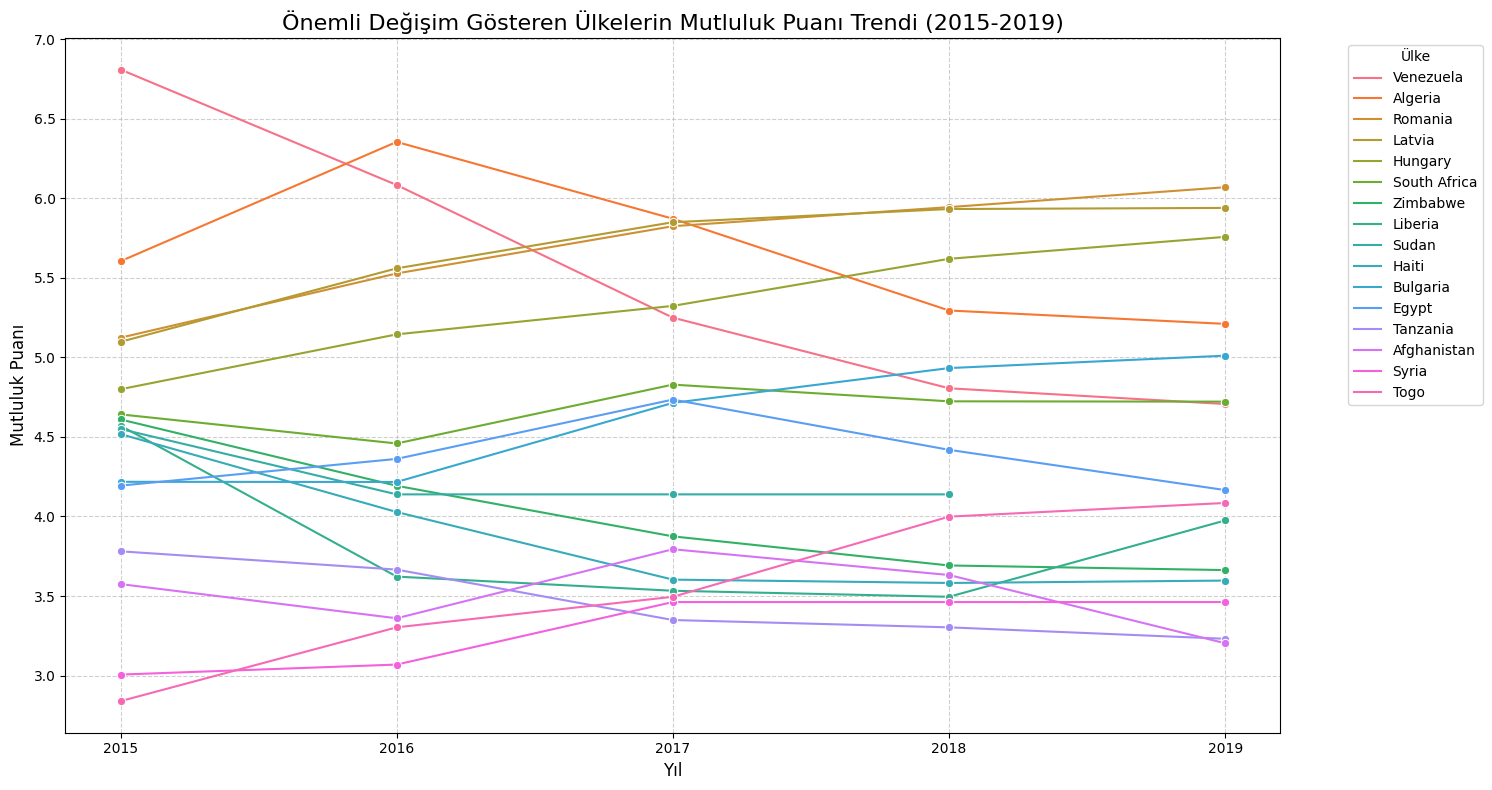

In [11]:
# Yıllar içindeki mutluluk puanı değişimini çizgi grafiği ile görselleştirme

# En çok puan artışı ve azalışı gösteren ülkeleri alalım (hem 2015-2016 hem de 2016-2017 için)
top_increase_countries_2015_2016 = results_2015_2016['Max_Score_Increase'].index.tolist()
top_decrease_countries_2015_2016 = results_2015_2016['Max_Score_Decrease'].index.tolist()
top_increase_countries_2016_2017 = results_2016_2017['Max_Score_Increase'].index.tolist()
top_decrease_countries_2016_2017 = results_2016_2017['Max_Score_Decrease'].index.tolist()

# Tüm bu ülkelerin listesini oluşturalım
countries_to_plot = list(set(top_increase_countries_2015_2016 + top_decrease_countries_2015_2016 +
                             top_increase_countries_2016_2017 + top_decrease_countries_2016_2017))

# Sadece bu ülkelere ait veriyi filtrele
df_plot = combined_df[combined_df['Country'].isin(countries_to_plot)]

# Görselleştirme
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_plot, x='Year', y='Happiness Score', hue='Country', marker='o')

plt.title('Önemli Değişim Gösteren Ülkelerin Mutluluk Puanı Trendi (2015-2019)', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Mutluluk Puanı', fontsize=12)
plt.xticks(df_plot['Year'].unique()) # Yıl etiketlerini tam göster
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Ülke', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()